<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Linear Algebra Basics</h2>

[Source](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d)  

## Eingevalues, SVD and PCA Decompositions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces

from IPython.display import display, Image
%matplotlib inline

Matrices as transformation of vectors

We can think of a matrix A as a transformation that acts on a vector x by multiplication to produce a new vector Ax. We use $[A]_{ij}$ or $a_{ij}$ to denote the element of matrix $A$ at row $i$ and column $j$. If $A$ is an $m×p$ matrix and $B$ is a $p×n$ matrix, the matrix product $C=AB$ (which is an $m×n$ matrix) is defined as:

In [2]:
Image(url='./images/1.png')

For example, the rotation matrix in a 2-d space can be defined as:

In [3]:
Image(url='./images/2.png')

This matrix rotates a vector about the origin by the angle θ (with counterclockwise rotation for a positive θ). Another example is the stretching matrix B in a 2-d space which is defined as:

In [4]:
Image(url='./images/3.png')

This matrix stretches a vector along the x-axis by a constant factor k but does not affect it in the y-direction. Similarly, we can have a stretching matrix in y-direction:

In [5]:
Image(url='./images/4.png')

As an example, if we have a vector

In [6]:
Image(url='./images/5.png')

then y=Ax is the vector which results after rotation of x by θ, and Bx is a vector which is the result of stretching x in the x-direction by a constant factor k.
The following code shows how these matrices can be applied to a vector x and visualized in Python. We can use the NumPy arrays as vectors and matrices.  
Here the rotation matrix is calculated for θ=30⁰ and in the stretching matrix k=3. y is the transformed vector of x. To plot the vectors, the quiver() function in matplotlib has been used.

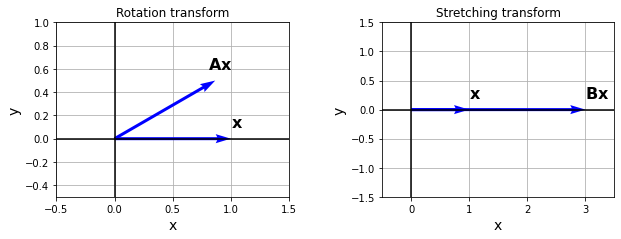

In [7]:
x = np.array([1,0]) # Original vector
theta = 30 * mt.pi / 180 # 30 degress in radian
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # Rotation matrix for theta=30 degrees
B = np.array([[3,0],[0,1]]) # Stretching matrix

Ax = A @ x  # y1 is the rotated vector
Bx = B @ x  # y2 is the stretched vector

# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])

# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])

origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[0,0], t1[0,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, t1[1,0], t1[1,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,1.5])
ax1.set_ylim([-0.5,1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[0,0], t2[0,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t2[1,0], t2[1,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,3.5])
ax2.set_ylim([-1.5,1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

Now we are going to try a different transformation matrix. Suppose that

In [8]:
Image(url='./images/6.png')

However, we don’t apply it to just one vector. Initially, we have a circle that contains all the vectors that are one unit away from the origin. These vectors have the general form of

In [9]:
Image(url='./images/7.png')

Now we calculate t=Ax. So t is the set of all the vectors in x which have been transformed by

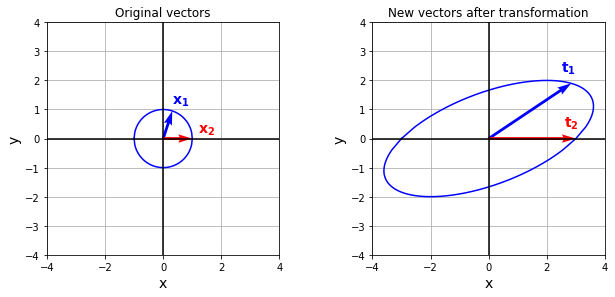

In [10]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

# getting a sample vector from x
x_sample1 = x[:, 65]
x_sample2 = x[:, 100]

A = np.array([[3, 2],
              [0, 2]]) 

t = A @ x  # Vectors in t are the transformed vectors of x

t_sample1 = t[:, 65]
t_sample2 = t[:, 100]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)

plt.show()

The initial vectors (x) on the left side form a circle as mentioned before, but the transformation matrix somehow changes this circle and turns it into an ellipse.

The sample vectors x1 and x2 in the circle are transformed into t1 and t2 respectively. So:

In [11]:
Image(url='./images/8.png')

### Eigenvalues and Eigenvectors

A vector is a quantity which has both magnitude and direction. The general effect of matrix A on the vectors in x is a combination of rotation and stretching. For example, it changes both the direction and magnitude of the vector x1 to give the transformed vector t1. However, for vector x2 only the magnitude changes after transformation. In fact, x2 and t2 have the same direction. Matrix A only stretches x2 in the same direction and gives the vector t2 which has a bigger magnitude. The only way to change the magnitude of a vector without changing its direction is by multiplying it with a scalar. So if we have a vector u, and λ is a scalar quantity then λu has the same direction and a different magnitude. So for a vector like x2 in figure 2, the effect of multiplying by A is like multiplying it with a scalar quantity like λ.

In [12]:
B = np.array([[-1, 1],
              [0, -2]]) 
lam, u = LA.eig(B)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [-1. -2.]
u= [[ 1.     -0.7071]
 [ 0.      0.7071]]


In [13]:
A = np.array([[3, 2],
              [0, 2]]) 
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


### Plotting the eigenvectors

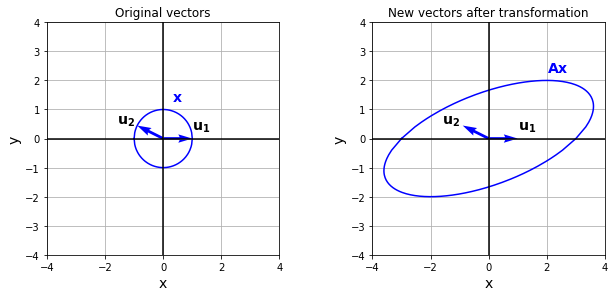

In [15]:
t = A @ x   # Vectors in t are the transformed vectors of x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2, 2.3, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

### Transformation by a symmetric matrix

lam= [3.618 1.382]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


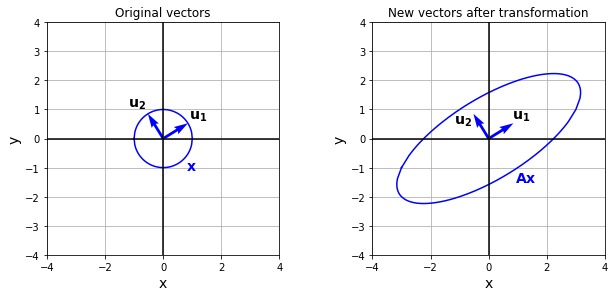

In [16]:
A = np.array([[3, 1],
              [1, 2]]) 
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

t = A @ x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.9, 0.7, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.2, 1.1, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.8, -1.1, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.8, 0.7, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(0.9, -1.5, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

lam= [3.618 1.382]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


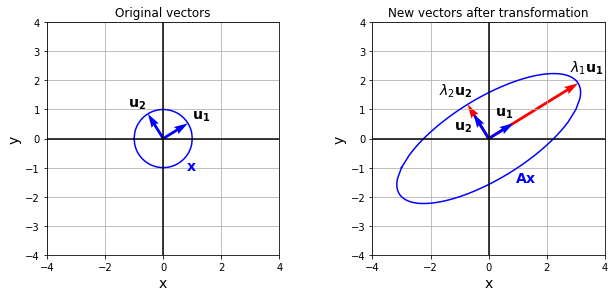

In [18]:
A = np.array([[3, 1],
              [1, 2]]) 
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

t = A @ x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.7, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.2, 1.1, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.8, -1.1, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, lam[0] * u[0,0], lam[0] * u[1,0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, lam[1] * u[0,1], lam[1] * u[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.2, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.3, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2.8, 2.3, "$\lambda_1\mathbf{u_1}$", fontsize=14)
ax2.text(-1.7, 1.5, "$\lambda_2\mathbf{u_2}$", fontsize=14)
ax2.text(0.9, -1.5, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

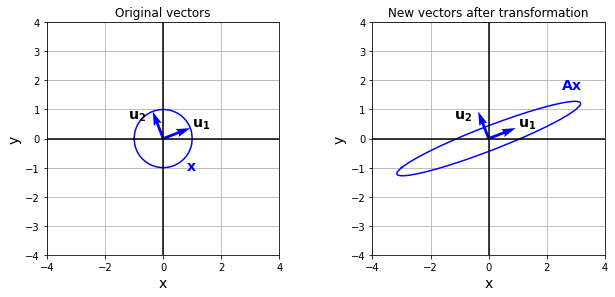

In [19]:
C = np.array([[3, 1],
              [1, 0.8]]) 
lam, u = LA.eig(C)

t = C @ x   # Vectors in t are the transformed vectors of x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.4, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.2, 0.7, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.8, -1.1, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.4, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.7, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2.5, 1.7, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

### Coordinate change

x_B= [[4.  ]
 [2.83]]


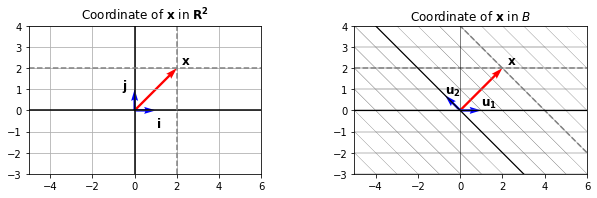

In [20]:
# The Basis
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

# Change of coordinate matrix
p =np.concatenate([v_1, v_2], axis=1)
p_inv = np.linalg.inv(p) 

# Coordinate of x in R^2
x=np.array([[2], [2]])

# New coordinate relative to basis B
x_B = p_inv @ x

print("x_B=", np.round(x_B, 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x in R2
ax1.quiver(*origin, x[0], x[1], color=['r'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, 1, 0, color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, 0, 1, color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)

ax1.set_xlim([-5,6])
ax1.set_ylim([-3,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Coordinate of $\mathbf{x}$ in $\mathbf{R^2}$")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(x[0]+0.2, x[1]+0.2, "$\mathbf{x}$", fontsize=12)
ax1.text(1, -0.8, "$\mathbf{i}$", fontsize=12)
ax1.text(-0.6, 1, "$\mathbf{j}$", fontsize=12)
ax1.axvline(x=x[0], color='grey', linestyle='--')
ax1.axhline(y=x[1], color='grey', linestyle='--')

# Plotting x in B
# Plotting the grid
multipliers = np.linspace(-10,10,100)

for i in range(-6,7,4):
    for j in range(-6,7,1):
        grid_1 = (v_1 * multipliers) + np.array([[i],[j]])
        grid_2 = (v_2 * multipliers) + np.array([[i],[j]])
        ax2.plot(grid_1[0], grid_1[1], color='grey', linewidth=0.2)
        ax2.plot(grid_2[0], grid_2[1], color='grey', linewidth=0.2)
        
# Plotting the vector guide
vector_guide_1 = (v_1 * multipliers) + x
vector_guide_2 = (v_2 * multipliers) + x
ax2.plot(vector_guide_1[0], vector_guide_1[1], color='grey', linewidth=1.5, linestyle='--')
ax2.plot(vector_guide_2[0], vector_guide_2[1], color='grey', linewidth=1.5, linestyle='--')

# Plotting the axis
vector_guide_1 = (v_1 * multipliers) + np.array([[0],[0]])
vector_guide_2 = (v_2 * multipliers) + np.array([[0],[0]])
ax2.plot(vector_guide_1[0], vector_guide_1[1], color='black', linewidth=1.2)
ax2.plot(vector_guide_2[0], vector_guide_2[1], color='black', linewidth=1.2)

ax2.quiver(*origin, x[0], x[1], color=['r'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, v_1[0], v_1[1], color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, v_2[0], v_2[1], color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)

ax2.set_xlim([-5,6])
ax2.set_ylim([-3,4])
ax2.set_aspect('equal')

ax2.set_title("Coordinate of $\mathbf{x}$ in $\mathit{B}$")
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.text(x[0]+0.2, x[1]+0.2, "$\mathbf{x}$", fontsize=12)
ax2.text(1, 0.2, "$\mathbf{u_1}$", fontsize=12)
ax2.text(-0.7, 0.8, "$\mathbf{u_2}$", fontsize=12)

plt.show()

### Finding the matrices in the eigendecomposition equation

In [21]:
A = np.array([[3, 1],
              [1, 2]])   
lam, u = LA.eig(A)

u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
A_1 = lam1 * (u1 @ u1.T)
u2= u[:,1].reshape(2,1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)
print("A_1=", np.round(A_1, 4))


A_1= [[2.618 1.618]
 [1.618 1.   ]]


In [22]:
lam_A_1, u_A_1 = LA.eig(A_1)
print("lam=", np.round(lam_A_1, 4))
print("u=", np.round(u_A_1, 4))

lam= [ 3.618 -0.   ]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


### The effect of the eigendecomposition matrix


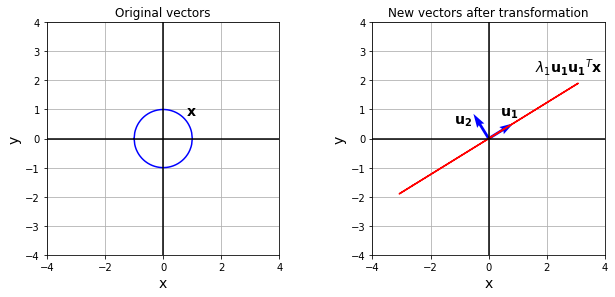

In [24]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

t = A_1 @ x  # Vectors in t are the transformed vectors of x

# getting the transformed sample of x from t
t_sample = t[:, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting s
ax1.plot(x[0,:], x[1,:], color='b')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.8, 0.8, "$\mathbf{x}$", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='r')
ax2.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,1], u[1,1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.4, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(1.6, 2.3, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=14)

plt.show()

### Rank

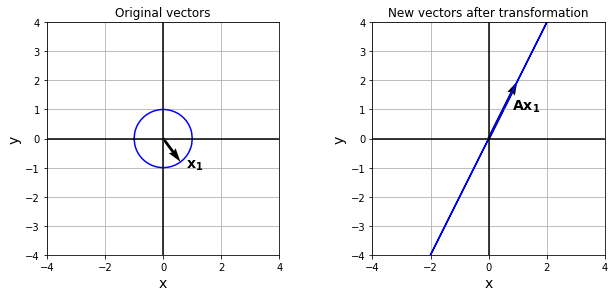

In [25]:
F = np.array([[3, 1],
              [6, 2]]) 

t = F @ x   # Vectors in t are the transformed vectors of x

x_sample = x[:, 120]
t_sample = t[:, 120]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, x_sample[0], x_sample[1], color=['black'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.8, -1, "$\mathbf{x_1}$", fontsize=14, color='black')

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample[0], t_sample[1], color=['black'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.8, 1, "$\mathbf{Ax_1}$", fontsize=14, color='black')

plt.show()

### The eigendecomposition process

### Matrix approximation using eigendecomposition

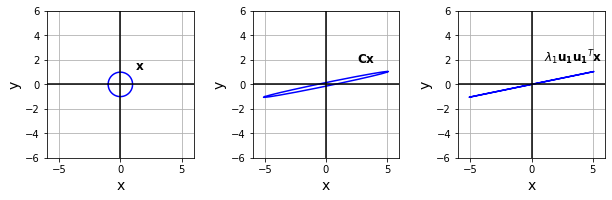

In [26]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

C = np.array([[5, 1],
              [1, 0.35]]) 
lam, u = LA.eig(C)

u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# C_1 = lambda_1 * u1 * u1^T
C_1 = lam1 * (u1 @ u1.T)

t = C @ x  # Vectors in t are the transformed vectors of x
t1 = C_1 @ x

# getting the transformed sample of x from t
t_sample = t[:, 100]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-6,6])
ax1.set_ylim([-6,6])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1.2, 1.2, "$\mathbf{x}$", fontsize=12)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-6,6])
ax2.set_ylim([-6,6])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 1.8, "$\mathbf{Cx}$", fontsize=12)

# Plotting the first term in the eigendecomposition equation
ax3.plot(t1[0, :], t1[1, :], color='b')
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('y', fontsize=14)
ax3.set_xlim([-6,6])
ax3.set_ylim([-6,6])
ax3.set_aspect('equal')
ax3.grid(True)
ax3.axhline(y=0, color='k')
ax3.axvline(x=0, color='k')
ax3.text(1.0, 1.8, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=12)

plt.show()

### Eigenvectors of non-symmetric matrices

In [27]:
B = np.array([[3, -1],
              [1, 2]]) 
lam, u = LA.eig(B)

print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [2.5+0.866j 2.5-0.866j]
u= [[0.7071+0.j     0.7071-0.j    ]
 [0.3536-0.6124j 0.3536+0.6124j]]


lam= [2. 2.]
u= [[ 1. -1.]
 [ 0.  0.]]


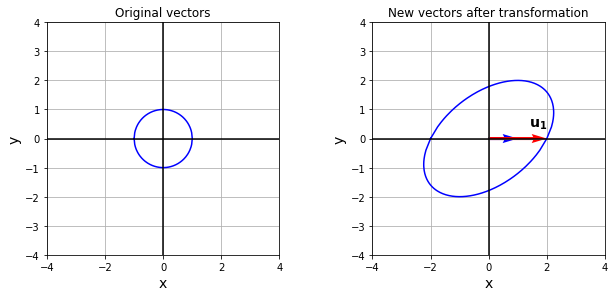

In [28]:
B = np.array([[2, 1],
              [0, 2]]) 
lam, u = LA.eig(B)

print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

t = B @ x  # Vectors in t are the transformed vectors of x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

# Plotting u
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,0], u[1,0], color=['b'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, 2*u[0,0], 2*u[1,0], color=['r'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.4, 0.4, "$\mathbf{u_1}$", fontsize=14)

plt.show()


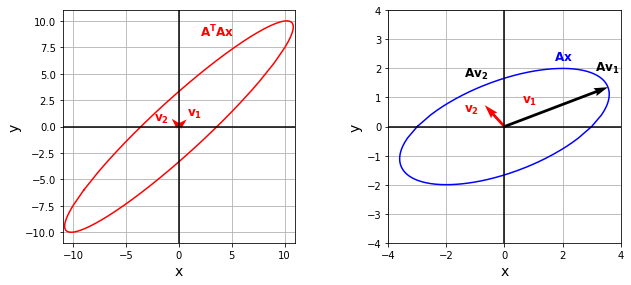

In [30]:
A = np.array([[3, 2],
              [0, 2]]) 
lam_A, u_A = LA.eig(A)

A2 = A.T @ A

lam_A2, u_A2 = LA.eig(A2)

t = A @ x   # Vectors in t are the transformed vectors of x
t1 = A2 @ x  # Vectors of A.A
Av = A @ u_A2  # Vectors Avi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting A.A
ax1.plot(t1[0, :], t1[1, :], color='r')
ax1.quiver(*origin, u_A2[0,0], u_A2[1,0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, u_A2[0,1], u_A2[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-11, 11])
ax1.set_ylim([-11, 11])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(2, 8.5, "$\mathbf{A^TAx}$", color='r', fontsize=12)
ax1.text(0.8, 1, "$\mathbf{v_1}$", color='r', fontsize=12)
ax1.text(-2.4, 0.5, "$\mathbf{v_2}$", color='r', fontsize=12)

# Plotting Ax
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, Av[0,0], Av[1,0], color=['black'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u_A2[0,1], u_A2[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.7, 2.3, "$\mathbf{Ax}$", color="b", fontsize=12)
ax2.text(0.6, 0.8, "$\mathbf{v_1}$", color='r', fontsize=12)
ax2.text(-1.4, 0.5, "$\mathbf{v_2}$", color='r', fontsize=12)
ax2.text(3.1, 1.9, "$\mathbf{Av_1}$", color='black', fontsize=12)
ax2.text(-1.4, 1.7, "$\mathbf{Av_2}$", color='black', fontsize=12)

plt.show()

### SVD Example

In [31]:
A = np.array([[4, 1, 3],
              [8, 3, -2]])
lam, v = LA.eig(A.T @ A)
print("lam=", np.round(lam, 4))
print("v=", np.round(v, 4))

lam= [90.1167  0.     12.8833]
v= [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


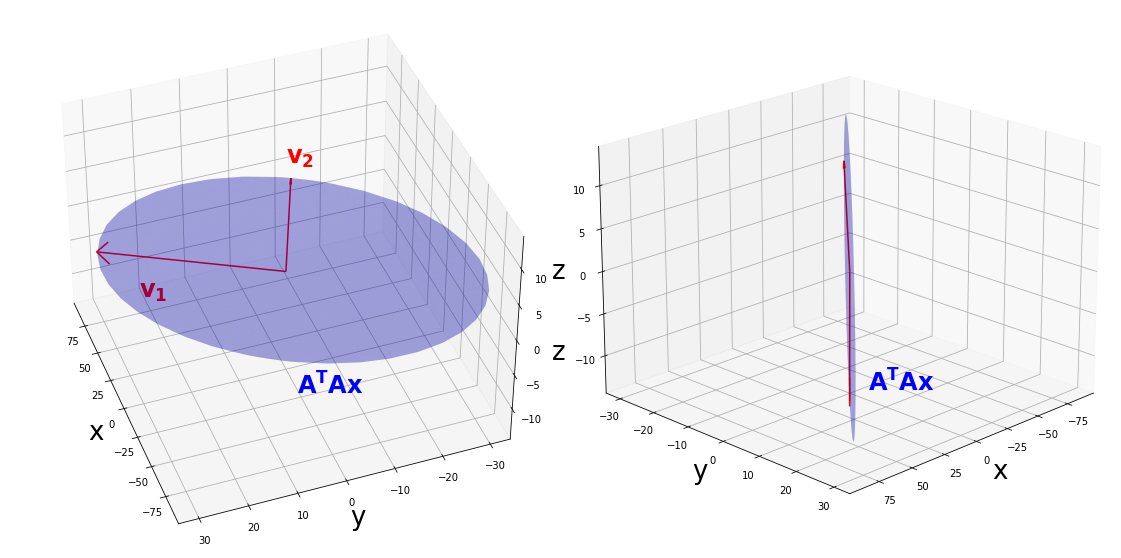

In [32]:
fig = plt.figure(figsize=(30,10))
plt.subplots_adjust(wspace=0.03)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

num_phi_steps = 30
num_theta_steps = 20
phi, theta = np.mgrid[0:2*np.pi:(num_phi_steps * 1j), 0:np.pi:(num_theta_steps * 1j)]
xi = np.cos(phi)*np.sin(theta)
yi = np.sin(phi)*np.sin(theta)
zi = np.cos(theta)

x = np.vstack((xi.reshape(1,-1),yi.reshape(1,-1), zi.reshape(1,-1)))
A = np.array([[4, 1, 3],
              [8, 3, -2]])
t = A.T @ A @ x
lam, v = LA.eig(A.T @ A)
tx = t[0,:].reshape(num_phi_steps, num_theta_steps)
ty = t[1,:].reshape(num_phi_steps, num_theta_steps)
tz = t[2,:].reshape(num_phi_steps, num_theta_steps)

ax1.plot_surface(tx, ty, tz, color="b", alpha=0.2)
ax1.quiver(0, 0, 0, lam[0]*v[0,0], lam[0]* v[1,0], lam[0]*v[2,0], color="r", length=1, arrow_length_ratio=0.07)
ax1.quiver(0, 0, 0, lam[2]*v[0,2], lam[2]* v[1,2], lam[2]*v[2,2], color="r", length=1, arrow_length_ratio=0.07)
ax1.view_init(40, 160)
ax1.set_xlabel('x', fontsize=26)
ax1.set_ylabel('y', fontsize=26)
ax1.set_zlabel('z', fontsize=26)
ax1.text(0.5, -2.5, -19,  "$\mathbf{A^TAx}$", fontsize=24, color='b')
ax1.text(0.5, 30, 1,  "$\mathbf{v_1}$", fontsize=24, color='r')
ax1.text(0.5, 0, 15,  "$\mathbf{v_2}$", fontsize=24, color='r')

ax2.plot_surface(tx, ty, tz, color="b", alpha=0.2)
ax2.quiver(0, 0, 0, lam[0]*v[0,0], lam[0]* v[1,0], lam[0]*v[2,0], color="r", length=1, arrow_length_ratio=0.07)
ax2.quiver(0, 0, 0, lam[2]*v[0,2], lam[2]* v[1,2], lam[2]*v[2,2], color="r", length=1, arrow_length_ratio=0.07)
ax2.view_init(20, 45)
ax2.set_xlabel('x', fontsize=26)
ax2.set_ylabel('y', fontsize=26)
ax2.set_zlabel('z', fontsize=26)
ax2.text(-30, -5.5, -17,  "$\mathbf{A^TAx}$", fontsize=24, color='b')

plt.show()

### Constructing $\Sigma$ and V

In [33]:
V = v[:, lam.argsort()[::-1]]

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)

print("Sigma=", np.round(Sigma, 4))
print("V=", np.round(V, 4))

Sigma= [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
V= [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


### Constructing U

In [34]:
r = len(sigma)
U = A @ V[:,:r] / sigma
print("U=", np.round(U, 4))

U= [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


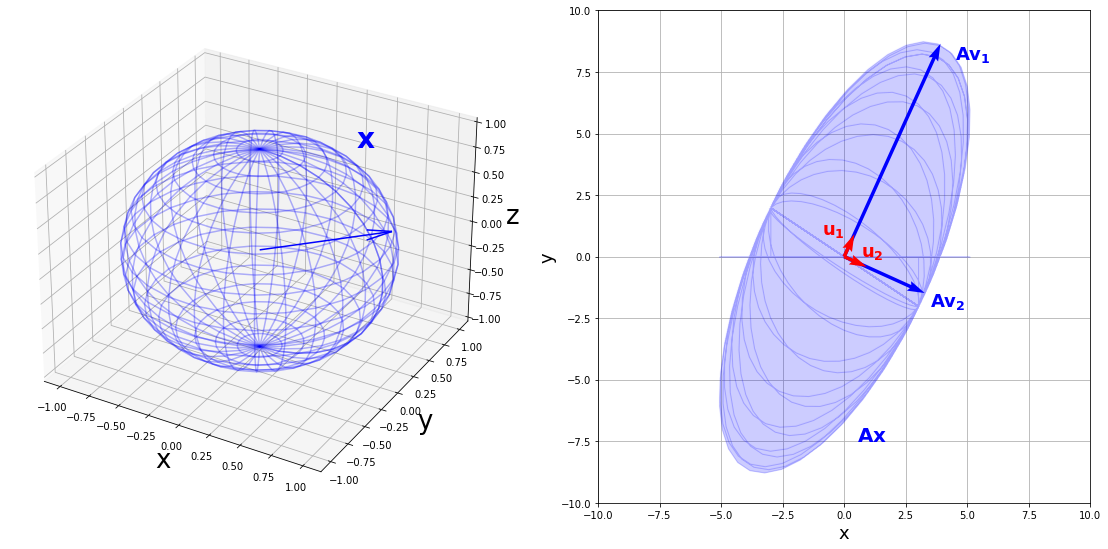

In [35]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132)

t_A = A @ x

tx = t_A[0,:].reshape(num_phi_steps, num_theta_steps)
ty = t_A[1,:].reshape(num_phi_steps, num_theta_steps)
tz = np.zeros((num_phi_steps * num_theta_steps)).reshape(num_phi_steps, num_theta_steps)

v1= V[:,0].reshape(3,1)
v2= V[:,1].reshape(3,1)

sigma1 = sigma[0]
sigma2 = sigma[1]

Av1 = A @ v1
Av2 = A @ v2

u1 = Av1 / sigma1
u2 = Av2 / sigma2

ax1.plot_wireframe(xi, yi, zi, color='b', alpha =0.3)
ax1.quiver(0, 0, 0, 0.7, mt.sqrt(1-0.7**2), 0, color="b", length=1, arrow_length_ratio=0.2)
ax1.set_xlabel('x', fontsize=26)
ax1.set_ylabel('y', fontsize=26)
ax1.set_zlabel('z', fontsize=26)
ax1.text(0.5, 0.5,0.9,  "$\mathbf{x}$", fontsize=28, color='b')

ax2.plot(t_A[0, :], t_A[1, :], color='b', alpha=0.02) # Ax
ax2.fill_between(t_A[0, :], t_A[1, :], color='b', alpha=0.2) # Ax
ax2.quiver(*origin, Av1[0,:], Av1[1,:], color=['b'], width=0.007, 
                 angles='xy', scale_units='xy', scale=1) # Av1
ax2.quiver(*origin, Av2[0,:], Av2[1,:], color=['b'], width=0.007, 
                 angles='xy', scale_units='xy', scale=1) # Av2

ax2.quiver(*origin, u1[0,:], u1[1,:], color=['r'], width=0.007, 
                 angles='xy', scale_units='xy', scale=1) # u1
ax2.quiver(*origin, u2[0,:], u2[1,:], color=['r'], width=0.007, 
                 angles='xy', scale_units='xy', scale=1) # u2

ax2.set_aspect('equal')
ax2.set_xlabel('x', fontsize=18)
ax2.set_ylabel('y', fontsize=18)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
ax2.grid(True)
ax2.set_axisbelow(True)

ax2.text(0.5, -7.5,  "$\mathbf{Ax}$", fontsize=20, color='b')
ax2.text(4.5, 8,  "$\mathbf{Av_1}$", fontsize=18, color='b')
ax2.text(3.5, -2,  "$\mathbf{Av_2}$", fontsize=18, color='b')
ax2.text(-0.9, 0.9,  "$\mathbf{u_1}$", fontsize=18, color='r')
ax2.text(0.7, 0,  "$\mathbf{u_2}$", fontsize=18, color='r')

plt.show()

### Using the SVD() function

In [36]:
U, s, VT = LA.svd(A)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("V", np.round(VT.T, 4))

U= [[-0.4121 -0.9111]
 [-0.9111  0.4121]]
s= [9.493  3.5893]
V [[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]


### Reconstructing A

In [37]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
A_reconstructed = U @ Sigma @ VT
print("Reconstructed A=", A_reconstructed)

Reconstructed A= [[ 4.  1.  3.]
 [ 8.  3. -2.]]


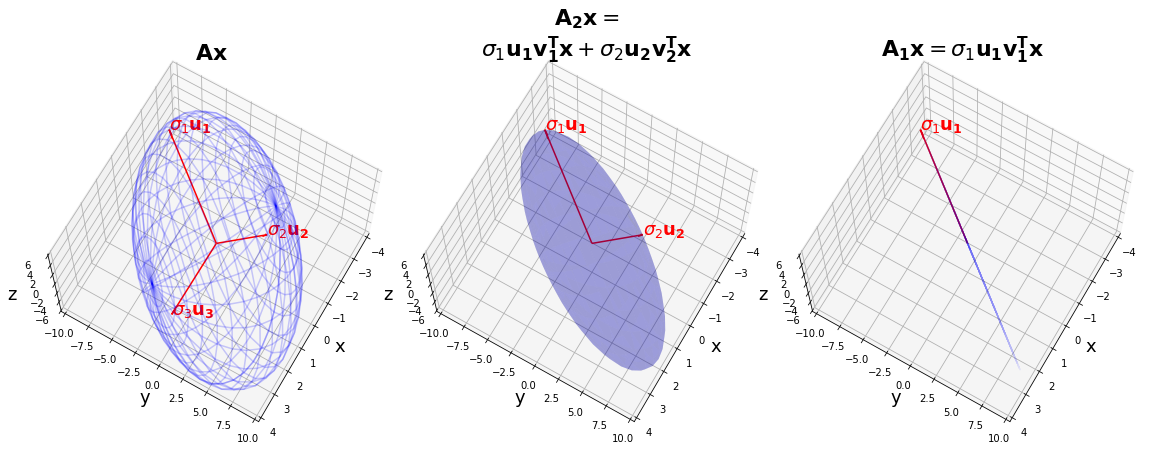

In [38]:
A = np.array([[4, 1, 3],
              [8, 7, -2], 
              [1, 5, 4]])

U, s, VT = LA.svd(A)
Sigma = np.zeros((A.shape[0], A.shape[1])) 

Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
A_rank1 = U[:, :1] @ Sigma[:1, :1] @ VT[:1, :]
A_rank2 = U[:, :2] @ Sigma[:2, :2] @ VT[:2, :]

u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
xi = np.cos(u)*np.sin(v)
yi = np.sin(u)*np.sin(v)
zi = np.cos(v)

x = np.vstack((xi.reshape(1,-1), yi.reshape(1,-1), zi.reshape(1,-1)))

t1 = A @ x
t2 = A_rank2 @ x
t3 = A_rank1 @ x

tx1 = t1[0,:].reshape(30,20)
ty1 = t1[1,:].reshape(30,20)
tz1 = t1[2,:].reshape(30,20)

tx2 = t2[0,:].reshape(30,20)
ty2 = t2[1,:].reshape(30,20)
tz2 = t2[2,:].reshape(30,20)

tx3 = t3[0,:].reshape(30,20)
ty3 = t3[1,:].reshape(30,20)
tz3 = t3[2,:].reshape(30,20)

fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.03)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# plot 1
ax1.plot_wireframe(tx1, ty1, tz1, color="b", alpha=0.2)
ax1.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color="r", length=1, arrow_length_ratio=0.07)
ax1.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color="r")
ax1.quiver(0, 0, 0, s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], color="r", length=1, arrow_length_ratio=0.07)
ax1.text(s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], "$\sigma_2\mathbf{u_2}$", fontsize=18, color="r")
ax1.quiver(0, 0, 0, s[2]*U[0,2], s[2]* U[1,2], s[2]*U[2,2], color="r", length=1, arrow_length_ratio=0.07)
ax1.text(s[2]*U[0,2], s[2]* U[1,2], s[2]*U[2,2], "$\sigma_3\mathbf{u_3}$", fontsize=18, color="r")

ax1.set_xlabel("x", fontsize=18)
ax1.set_ylabel("y", fontsize=18)
ax1.set_zlabel("z", fontsize=18)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-10, 10])
ax1.set_zlim([-6, 6])
ax1.set_title("$\mathbf{Ax}$", fontsize=22)

# plot 2
ax2.plot_surface(tx2, ty2, tz2, color="b", alpha=0.2)
ax2.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color="r", length=1, arrow_length_ratio=0.07)
ax2.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color="r")
ax2.quiver(0, 0, 0, s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], color="r", length=1, arrow_length_ratio=0.07)
ax2.text(s[1]*U[0,1], s[1]* U[1,1], s[1]*U[2,1], "$\sigma_2\mathbf{u_2}$", fontsize=18, color="r")
ax2.set_xlim([-4, 4])
ax2.set_ylim([-10, 10])
ax2.set_zlim([-6, 6])
ax2.set_xlabel("x", fontsize=18)
ax2.set_ylabel("y", fontsize=18)
ax2.set_zlabel("z", fontsize=18)
ax2.set_title("$\mathbf{A_{2}x}=$\n$\sigma_1\mathbf{u_1v_1^Tx}+\sigma_2\mathbf{u_2v_2^Tx}$", fontsize=22)

# plot 3
ax3.plot_wireframe(tx3, ty3, tz3, color="b", alpha=0.02)
ax3.quiver(0, 0, 0, s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], color="r", length=1, arrow_length_ratio=0.07)
ax3.text(s[0]*U[0,0], s[0]* U[1,0], s[0]*U[2,0], "$\sigma_1\mathbf{u_1}$", fontsize=18, color="r")
ax3.set_xlim([-4, 4])
ax3.set_ylim([-10, 10])
ax3.set_zlim([-6, 6])
ax3.set_xlabel("x", fontsize=18)
ax3.set_ylabel("y", fontsize=18)
ax3.set_zlabel("z", fontsize=18)
ax3.set_title("$\mathbf{A_{1}x}=\sigma_1\mathbf{u_1v_1^Tx}$", fontsize=22)

i=70
j=30

ax1.view_init(i, j)
ax2.view_init(i, j)
ax3.view_init(i, j)

plt.draw()

### Applications
### Dimensionality Reduction

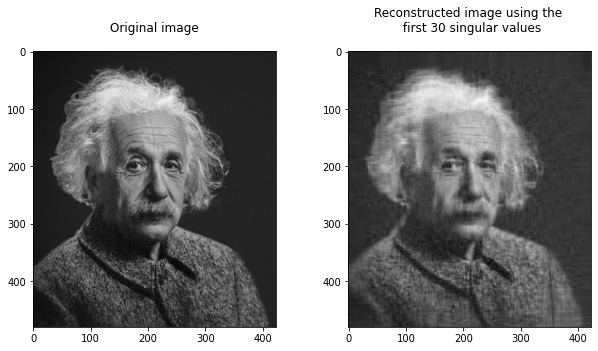

In [39]:
# Reading the image
mat = plt.imread("./images/photo.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 30
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.05)

plt.show()

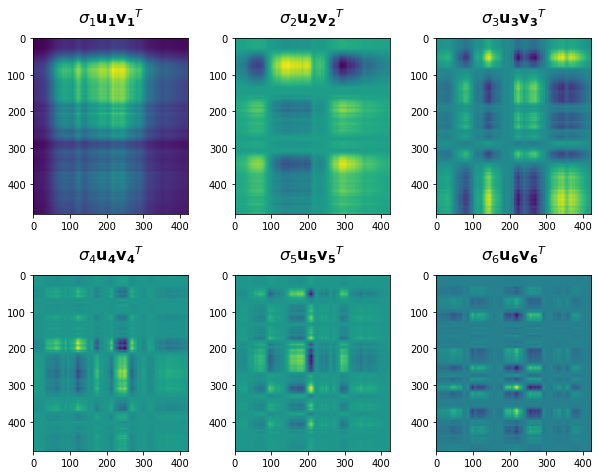

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()

### Analyzing the shapes image

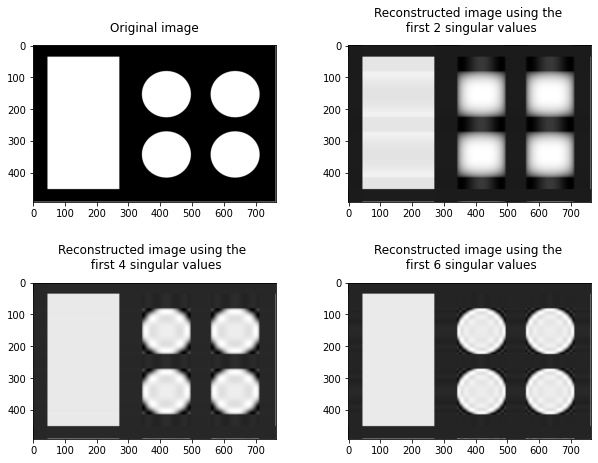

In [41]:
# Reading the image
mat = plt.imread("./images/shapes.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image", y=1.05)

for i in range(1, 4):
    k = i * 2
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.05)

plt.show()

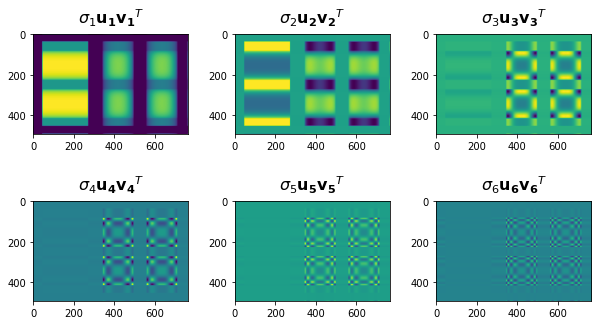

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.05)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    #mat_i[mat_i < 1e-8] = 0
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()

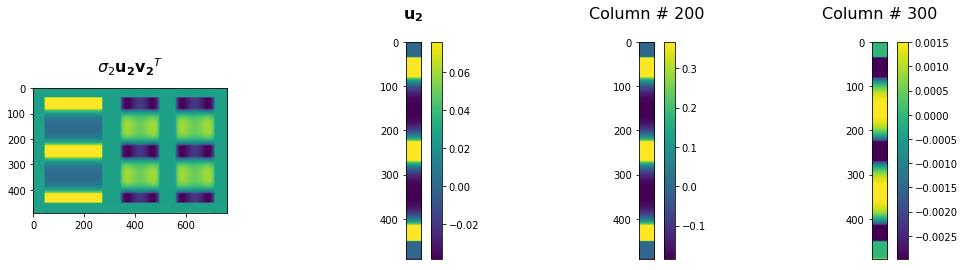

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))

mat_1 = s[1] * U[:,1].reshape(-1,1) @ VT[1,:].reshape(1,-1)
col1 = U[:,1].reshape(-1,1) * np.ones((mat_1.shape[0], 35))
col2 = mat_1[:,200].reshape(-1,1)  * np.ones((mat_1.shape[0], 35))
col3 = mat_1[:,300].reshape(-1,1) * np.ones((mat_1.shape[0], 35))

# plot 1
ax1.imshow(mat_1)
ax1.set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(2), y=1.08, fontsize=16)
# plot 2
pos1 = ax2.imshow(col1)
ax2.axes.get_xaxis().set_visible(False)
ax2.set_title("$\mathbf{u_2}$", fontsize=16, y=1.08)
fig.colorbar(pos1, ax=ax2)
# plot 3
pos2 = ax3.imshow(col2)
ax3.axes.get_xaxis().set_visible(False)
ax3.set_title("Column # 200", fontsize=16, y=1.08)
fig.colorbar(pos2, ax=ax3)

# plot 4
pos2 = ax4.imshow(col3)
ax4.axes.get_xaxis().set_visible(False)
ax4.set_title("Column # 300", fontsize=16, y=1.08)
fig.colorbar(pos2, ax=ax4)

plt.show()

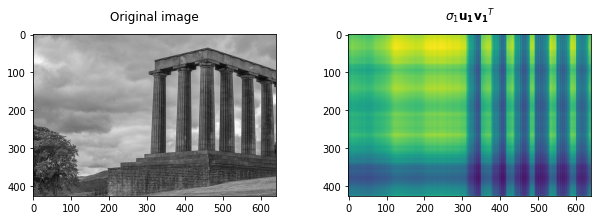

In [44]:
# Reading the image
mat = plt.imread("./images/monument.png")

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 1
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image", y=1.05)

ax2.imshow(mat_approx)
ax2.set_title("$\sigma_1\mathbf{u_1}\mathbf{v_1}^T$", y=1.05)

plt.show()

### Eigenfaces

In [45]:
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/renato/scikit_learn_data
(400, 64, 64)


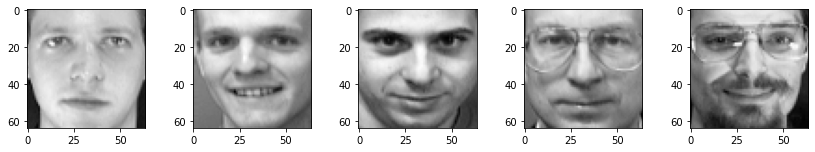

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(0, 5):
    axes[i].imshow(imgs[i*40], cmap='gray')

plt.show()

### Making the image matrix

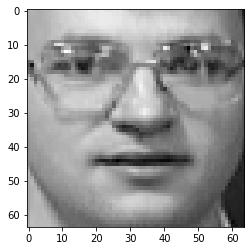

In [47]:
M = imgs.reshape((-1, imgs.shape[1]*imgs.shape[2])).T

x= np.zeros((400, 1))
x[50, 0] = 1
y = M @ x
plt.imshow(y.reshape((64,64)), cmap='gray')
plt.show()

### Showing the Eigenfaces

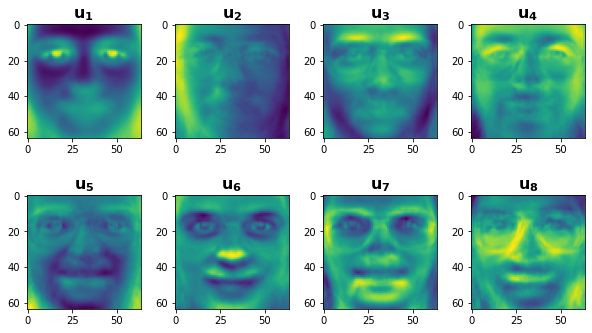

In [48]:
U, s, VT = LA.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape((64,64)))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)

plt.show()

### Image reconstruction using eigenfaces

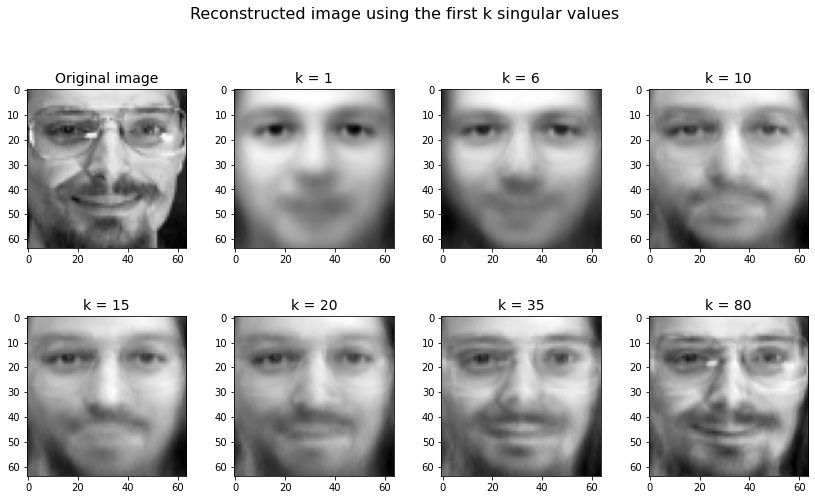

In [49]:
x = np.zeros((400, 1))
x[160, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[160], cmap='gray')
axes[0, 0].set_title("Original image", fontsize=14)

k_list = [1, 6, 10, 15, 20, 35, 80]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1] 
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64,64)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k), fontsize=14)

plt.show()

### Reducing noise

In [50]:
# Reading the image
mat = plt.imread("./images/text.png")

# Adding noise
noise = np.random.rand(mat.shape[0], mat.shape[1])
mat[noise > 0.95] = 0

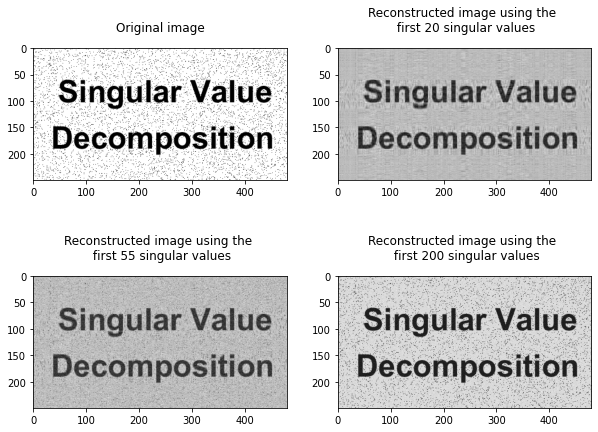

In [51]:
# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image", y=1.08)

k_list = [20, 55, 200]
for i in range(1, 4):
    k = k_list[i-1]
    mat_rank_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    axes[i // 2, i % 2].imshow(mat_rank_k, cmap='gray')
    axes[i // 2, i % 2].set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.08)

plt.show()

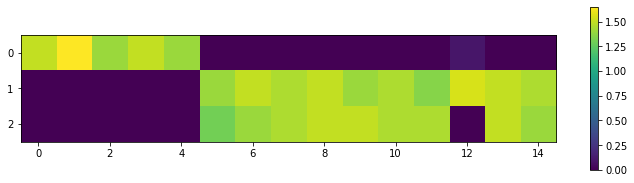

In [52]:
# Defining the matrix
mat = np.array([[1.5, 1.65, 1.4, 1.5, 1.4, 0,   0,   0,    0,   0,    0,    0,     0.1,   0,    0],
                [0,   0,    0,   0,   0   , 1.4, 1.5, 1.45, 1.5, 1.4,  1.45, 1.35,  1.55, 1.5,  1.45],
                [0,   0,    0,   0,   0   , 1.3, 1.4, 1.45, 1.5, 1.5,  1.45, 1.45,  0,   1.5,  1.4]])

fig, ax = plt.subplots(1, 1, figsize=(12,3))
pos = ax.imshow(mat)
fig.colorbar(pos, ax=ax)
plt.show()

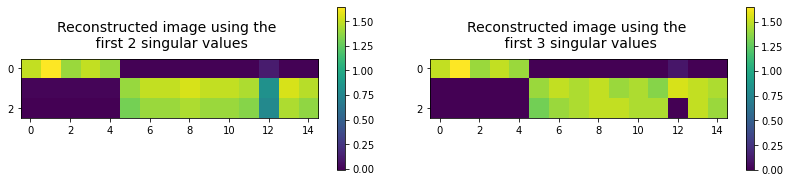

In [53]:
# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(1, 2, figsize=(14,3))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(2):
    k = i + 2
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    pos = axes[i].imshow(mat_approx)
    axes[i].set_title("Reconstructed image using the \n first {} singular values".format(k), y=1.08, fontsize =14)
    fig.colorbar(pos, ax=axes[i])

plt.show()

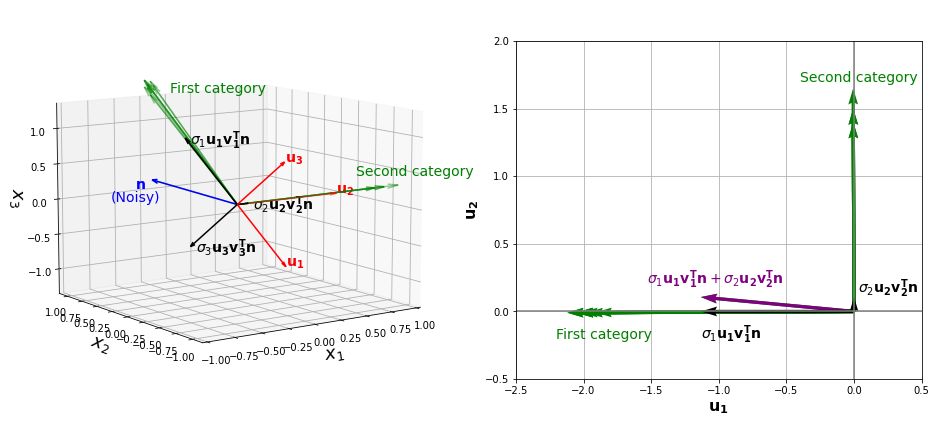

In [54]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# plot 1
for i in range(mat.shape[1]):
    ax1.quiver(0, 0, 0, mat[0, i], mat[1, i], mat[2, i], color="g", length=1, arrow_length_ratio=0.07, alpha=0.4)
ax1.quiver(0, 0, 0, mat[0, 12], mat[1, 12], mat[2, 12], color="b", length=1, arrow_length_ratio=0.07)

ax1.quiver(0, 0, 0, U[0, 0], U[1, 0], U[2, 0], color="r", length=1, arrow_length_ratio=0.07)
ax1.quiver(0, 0, 0, U[0, 1], U[1, 1], U[2, 1], color="r", length=1, arrow_length_ratio=0.07, alpha =0.5)
ax1.quiver(0, 0, 0, U[0, 2], U[1, 2], U[2, 2], color="r", length=1, arrow_length_ratio=0.07)

index = np.zeros((15, 1))
index[12] = 1
for i in range(0, 3):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1) @ index
    ax1.quiver(0, 0, 0, mat_i[0, 0], mat_i[1, 0], mat_i[2, 0], color="black", length=1, arrow_length_ratio=0.08)
    ax1.text(mat_i[0, 0]+0.05, mat_i[1, 0], mat_i[2, 0]-0.1, "$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}^Tn}}$".format(i+1), fontsize=14, color='black')
    

ax1.set_xlabel('$x_1$', fontsize=18)
ax1.set_ylabel('$x_2$', fontsize=18)
ax1.set_zlabel('$x_3$', fontsize=18)

ax1.set_xlim([-1, 1])
ax1.set_ylim([-1.1, 1.1])
ax1.set_zlim([-1.3, 1.3])

ax1.text(U[0, 0], U[1, 0], U[2, 0], "$\mathbf{u_1}$", fontsize=14, color='r')
ax1.text(U[0, 1], U[1, 1], U[2, 1],  "$\mathbf{u_2}$", fontsize=14, color='r')
ax1.text(U[0, 2], U[1, 2], U[2, 2], "$\mathbf{u_3}$", fontsize=14, color='r')
ax1.text(mat[0, 12], mat[1, 12]+0.3, mat[2, 12]-0.2, "$\mathbf{n}$", fontsize=14, color='b')

ax1.text(mat[0, 12]-0.25, mat[1, 12]+0.3, mat[2, 12]-0.35, "(Noisy)", fontsize=14, color='b')
ax1.text(mat[0, 5]+0.2, mat[1, 5], mat[2, 5], "First category", fontsize=14, color='g')
ax1.text(mat[0, 0]-0.3, mat[1, 0], mat[2, 0]+0.2, "Second category", fontsize=14, color='g')

ax1.view_init(10, 235)

# plot 2
for i in range(15): 
    index = np.zeros((15, 1))
    index[i] = 1 
    a1 = (s[0] * VT[0,:].reshape(1,-1) @ index)[0] 
    a2 = (s[1] * VT[1,:].reshape(1,-1) @ index)[0] 
    ax2.quiver(*origin, a1, a2, color=['g'], width=0.008, angles='xy', scale_units='xy', scale=1) # vectors in u1-u2 space

index = np.zeros((15, 1))
index[12] = 1 
a1 = (s[0] * VT[0,:].reshape(1,-1) @ index)[0]
a2 = (s[1] * VT[1,:].reshape(1,-1) @ index)[0]
ax2.quiver(*origin, a1, a2, color=['purple'], width=0.008, angles='xy', scale_units='xy', scale=1) # n in u1-u2 space
ax2.quiver(*origin, a1, 0, color=['black'], width=0.008, angles='xy', scale_units='xy', scale=1) # projection of n on u1
ax2.quiver(*origin, 0, a2, color=['black'], width=0.008, angles='xy', scale_units='xy', scale=1) # projection of n on u2

ax2.set_xlabel('$\mathbf{u_1}$', fontsize=16)
ax2.set_ylabel('$\mathbf{u_2}$', fontsize=16)
ax2.set_xlim([-2.5, 0.5])
ax2.set_ylim([-0.5, 2])
ax2.set_aspect('equal')

ax2.grid(True)
ax2.set_axisbelow(True)
ax2.axhline(y=0, color='grey')
ax2.axvline(x=0, color='grey')
ax2.text(a1, -0.2, "$\sigma_1\mathbf{u_1}\mathbf{v_1^Tn}$", fontsize=14)
ax2.text(0.03, a2+0.03, "$\sigma_2\mathbf{u_2}\mathbf{v_2^Tn}$", color='black', fontsize=14) 
ax2.text(a1-0.4, a2+0.1, "$\sigma_1\mathbf{u_1}\mathbf{v_1^Tn} + \sigma_2\mathbf{u_2}\mathbf{v_2^Tn}$", 
         color='purple', fontsize=14) 
ax2.text(-2.2, -0.2, "First category", fontsize=14, color='g') 
ax2.text(-0.4, 1.7, "Second category", fontsize=14, color='g')

plt.show()

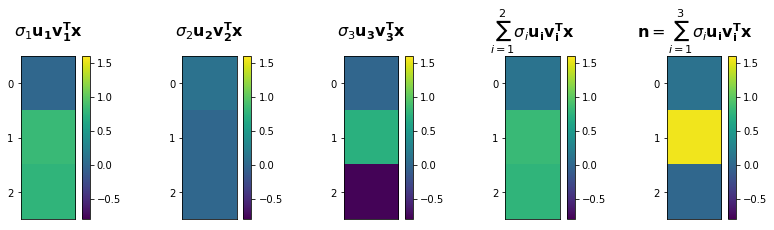

In [55]:
fig, axes = plt.subplots(1, 5, figsize=(14,3))
norm = colors.Normalize(vmin=-0.8, vmax=1.6)
for i in range(0, 3):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    pos = axes[i].imshow(mat_i[:, 12].reshape(-1,1))
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.set_yticks([0,1,2])
    axes[i].axes.set_yticklabels([0,1,2])
    pos.set_norm(norm)
    axes[i].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}^Tx}}$".format(i+1), y=1.08, fontsize=16)
    fig.colorbar(pos, ax=axes[i])

k = 2
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

i=3
pos = axes[i].imshow(mat_approx[:, 12].reshape(-1,1))
axes[i].axes.get_xaxis().set_visible(False)
axes[i].axes.set_yticks([0,1,2])
axes[i].axes.set_yticklabels([0,1,2])
pos.set_norm(norm)
axes[i].set_title("$\sum_{i=1}^{2}{\sigma_i\mathbf{u_i}\mathbf{v_i^Tx}}$", y=1.08, fontsize=16)
fig.colorbar(pos, ax=axes[i])

i=4
pos = axes[i].imshow(mat[:, 12].reshape(-1,1))
axes[i].axes.get_xaxis().set_visible(False)
axes[i].axes.set_yticks([0,1,2])
axes[i].axes.set_yticklabels([0,1,2])
pos.set_norm(norm)
axes[i].set_title("$\mathbf{n} = \sum_{i=1}^{3}{\sigma_i\mathbf{u_i}\mathbf{v_i^Tx}}$", y=1.08, fontsize=16)
fig.colorbar(pos, ax=axes[i])

plt.show()
